<h1 style="color:#034f84">Part I - Communicate data findings: Ford GoBike System Data</h1>
<h2 style="color:#b1cbbb">by Mame Diarra NIANE</h2> 

<h2 style="color:#c94c4c"> Introduction</h2>

> Bike-sharing systems have become increasingly popular in recent years as a sustainable and affordable means of transportation in urban areas. The Ford GoBike bike-sharing system in San Francisco's Bay Area is one such example, providing a convenient and efficient way to travel around the city. In this project, we will perform exploratory data analysis (EDA) on the usage data of the Ford GoBike system for February 2019.


>The data set includes information that covers over 180K entries of individual rides made in a bike-sharing system covering the greater San Francisco Bay area at the period of February 2019.

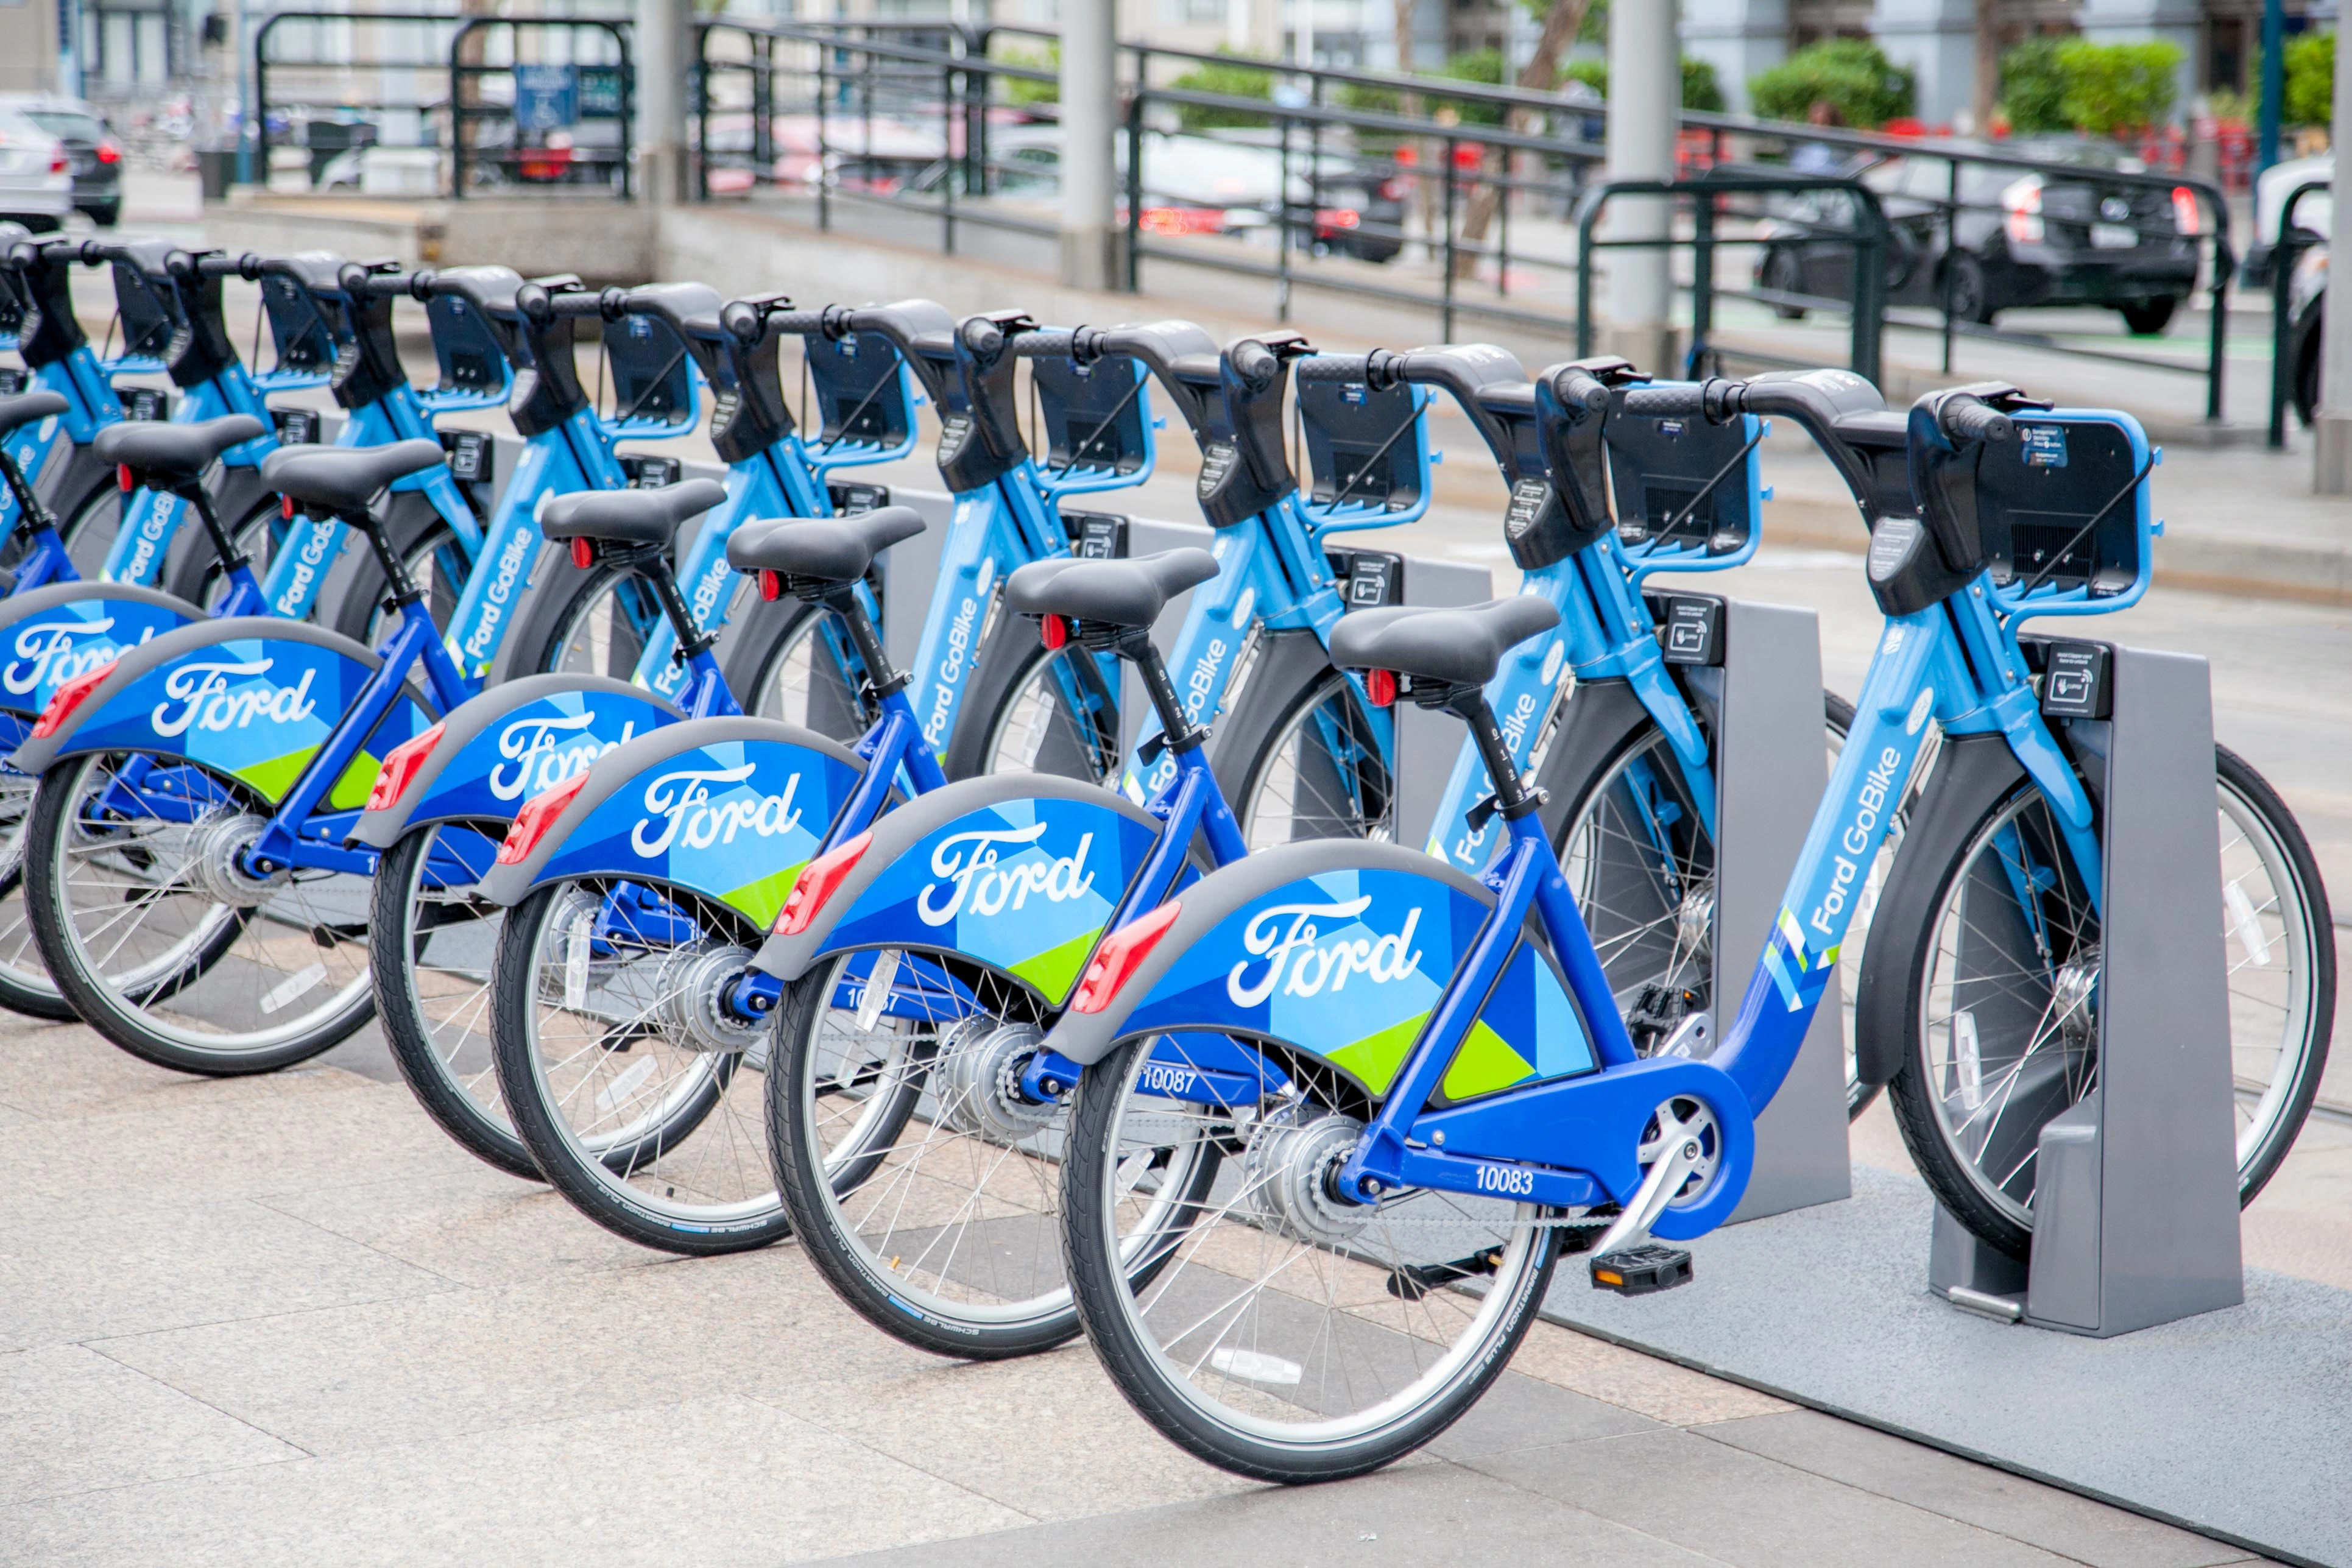



<h2 style="color:#c94c4c"> Preliminary Wrangling</h2>


In [162]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas_profiling as pp


%matplotlib inline

In [163]:
#Load the dataset
df_bike=pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [164]:
df_bike.shape

(183412, 16)

In [165]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [166]:
df_bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


`We can see that he maximum "duration_sec" is very high . we are going to check if there is more longest trip like that in the dataset`

In [167]:
df_bike.nlargest(20,'duration_sec')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
101361,85444,2019-02-13 17:59:55.1240,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,NaN,NaN,No
85465,84548,2019-02-16 15:48:25.0290,2019-02-17 15:17:33.0800,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,368.0,Myrtle St at Polk St,37.785434,-122.419622,6301,Subscriber,1981.0,Male,No
153705,83772,2019-02-05 12:44:54.2860,2019-02-06 12:01:06.6310,78.0,Folsom St at 9th St,37.773717,-122.411647,345.0,Hubbell St at 16th St,37.766483,-122.398279,3405,Customer,NaN,NaN,No
127999,83519,2019-02-09 15:16:17.5370,2019-02-10 14:28:17.2700,72.0,Page St at Scott St,37.772406,-122.435650,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5561,Customer,1990.0,Male,No
112435,83407,2019-02-11 16:25:33.0690,2019-02-12 15:35:40.9560,77.0,11th St at Natoma St,37.773507,-122.416040,344.0,16th St Depot,37.766349,-122.396292,1842,Customer,1988.0,Male,No
5203,83195,2019-02-27 14:47:23.1810,2019-02-28 13:53:58.4330,243.0,Bancroft Way at College Ave,37.869360,-122.254337,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,5781,Subscriber,1962.0,Female,Yes
95750,82512,2019-02-14 13:56:21.7280,2019-02-15 12:51:34.3150,368.0,Myrtle St at Polk St,37.785434,-122.419622,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,6152,Customer,1998.0,Other,No
173365,82385,2019-02-02 13:07:43.0360,2019-02-03 12:00:48.1750,377.0,Fell St at Stanyan St,37.771917,-122.453704,377.0,Fell St at Stanyan St,37.771917,-122.453704,2933,Customer,NaN,NaN,No
8631,81549,2019-02-27 09:41:38.5520,2019-02-28 08:20:48.3860,138.0,Jersey St at Church St,37.750900,-122.427411,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,2266,Subscriber,1963.0,Female,No
176987,80891,2019-02-01 11:05:18.9760,2019-02-02 09:33:30.1690,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,55.0,Webster St at Grove St,37.777053,-122.429558,3133,Customer,NaN,NaN,No


`there's indeed many bikes trip with long ride `

In [168]:
df_bike['start_station_name'].nunique()

329

In [169]:
#check the missing values in the dataset
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [170]:
df_bike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [171]:
#Check for duplicated rows
df_bike.duplicated().sum()

0

In [172]:
#check the differents usertypes and their numbers
df_bike.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

### Observations:

> * the Data consists of 183412 rows and 16 columns
> * start time and end time are not datetime
> * Missing values in the **start_station_id , start_station_name ,end_station_id ,end_station_name,member_birth_year and member_gender** columns
> * There's no duplicates in the dataset
> * The minimum member_birth_year is out of range(humanly impossible)

# Data cleaning issues

1. Erroneous data type in the **start_time ,end_time  (datetime instead of object)**  and the **user_type** must be a categorical type
2. Missing values in the **start_station_id , start_station_name ,end_station_id ,end_station_name,member_birth_year and member_gender** columns
3. integrate **start_day,start_day_name,start_hour and end_day,end_day_name,end_hour** column in the dataset
4. Drop columns that i didn't need for analysis
5. Create a **member_age** column and drop the **member_birth** year column
6. Change the trip duration unit from seconds to minute for convenience

## <h2 style="color:Green">Data Cleaning</h2> 

In [173]:
#Make a copy of the original data before cleaning 
df_bike_clean=df_bike.copy()

> 1. Erroneous data type in the **start_time ,end_time  (datetime instead of object)**  and the **user_type** must be a categorical type , **bike_id** should be string 


In [174]:
#Convert start_time and end_time  into datetime type
for column in ['start_time','end_time']:
    df_bike_clean[column]=df_bike_clean[column].astype('datetime64[ns]')
df_bike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [175]:
#convert user_type to category type
df_bike_clean['user_type']=pd.Categorical(df_bike_clean.user_type)

In [176]:
#convert bike_id to object type
df_bike_clean['bike_id']=df_bike_clean['bike_id'].astype('str')

> 2. Remove all the rows with missing values

In [177]:
#Remove missing values in the dataset
df_bike_clean=df_bike_clean.dropna()
df_bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> **member_birth_year** should be an int

In [178]:
#convert member_birth_year to int type
df_bike_clean['member_birth_year']=df_bike_clean['member_birth_year'].astype('int')

In [179]:
df_bike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [180]:
df_bike_clean.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,2001.000000


> Remove the columns not needed in the analysis( **start_station_id ,start_station_latitude ,start_station_longitude,end_station_latitude,end_station_longitude,bike_share_for_all_trip** )

In [181]:
no_needed_columns=['start_station_id' ,'start_station_latitude' ,'start_station_longitude','end_station_id','end_station_latitude','end_station_longitude','bike_share_for_all_trip']
df_bike_clean.drop(no_needed_columns,axis=1,inplace=True)

In [182]:
df_bike_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender'],
      dtype='object')

> Create the columns **start_day,start_day_name,start_hour and end_day,end_day_name,end_hour** in the dataset

In [183]:
df_bike_clean['start_day'] = df_bike_clean['start_time'].dt.day
df_bike_clean['start_day_name'] = df_bike_clean['start_time'].dt.day_name()
df_bike_clean['start_hour'] = df_bike_clean['start_time'].dt.hour
#df_bike_clean['start_time']=df_bike_clean['start_time'].dt.time

df_bike_clean['end_day'] = df_bike_clean['end_time'].dt.day
df_bike_clean['end_day_name'] = df_bike_clean['end_time'].dt.day_name()
df_bike_clean['end_hour'] = df_bike_clean['end_time'].dt.hour

In [184]:
df_bike_clean.dtypes

duration_sec                   int64
start_time            datetime64[ns]
end_time              datetime64[ns]
start_station_name            object
end_station_name              object
bike_id                       object
user_type                   category
member_birth_year              int64
member_gender                 object
start_day                      int64
start_day_name                object
start_hour                     int64
end_day                        int64
end_day_name                  object
end_hour                       int64
dtype: object

> 5. Create a **member_age** column and drop the **member_birth_year** column

In [185]:
df_bike_clean['member_age'] = 2019-df_bike_clean.member_birth_year
df_bike_clean=df_bike_clean.drop(['member_birth_year'],axis=1)

In [186]:
df_bike_clean.sample(10)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,start_day,start_day_name,start_hour,end_day,end_day_name,end_hour,member_age
95580,437,2019-02-15 13:20:21.993,2019-02-15 13:27:39.437,Howard St at 2nd St,Myrtle St at Polk St,6584,Subscriber,Male,15,Friday,13,15,Friday,13,33
137401,768,2019-02-08 08:39:13.969,2019-02-08 08:52:02.276,Grove St at Divisadero,Powell St BART Station (Market St at 5th St),1406,Customer,Other,8,Friday,8,8,Friday,8,35
165129,208,2019-02-05 07:47:32.909,2019-02-05 07:51:01.775,37th St at West St,MacArthur BART Station,3339,Subscriber,Male,5,Tuesday,7,5,Tuesday,7,42
49975,400,2019-02-21 20:02:38.375,2019-02-21 20:09:19.335,Broadway at Battery St,The Embarcadero at Bryant St,624,Subscriber,Male,21,Thursday,20,21,Thursday,20,51
136878,434,2019-02-08 09:14:00.550,2019-02-08 09:21:15.045,Berry St at 4th St,Powell St BART Station (Market St at 4th St),5007,Subscriber,Male,8,Friday,9,8,Friday,9,29
40330,431,2019-02-22 21:18:07.960,2019-02-22 21:25:19.797,Golden Gate Ave at Hyde St,Webster St at Grove St,5454,Subscriber,Female,22,Friday,21,22,Friday,21,33
140777,362,2019-02-07 18:41:18.126,2019-02-07 18:47:20.483,Bryant St at 6th St,Powell St BART Station (Market St at 5th St),5522,Subscriber,Male,7,Thursday,18,7,Thursday,18,43
30432,359,2019-02-24 19:59:15.548,2019-02-24 20:05:15.474,Ninth St at Heinz Ave,10th St at University Ave,5707,Subscriber,Male,24,Sunday,19,24,Sunday,20,44
137429,1011,2019-02-08 08:33:33.375,2019-02-08 08:50:24.802,Oregon St at Adeline St,Doyle St at 59th St,595,Subscriber,Female,8,Friday,8,8,Friday,8,32
79237,693,2019-02-18 17:47:28.841,2019-02-18 17:59:02.034,Davis St at Jackson St,San Francisco Caltrain (Townsend St at 4th St),4751,Subscriber,Male,18,Monday,17,18,Monday,17,53


> 6. Change the trip duration unit from seconds to minute for convenience

In [187]:
df_bike_clean['duration_min']=df_bike_clean['duration_sec']/60
df_bike_clean=df_bike_clean.drop(labels='duration_sec',axis=1)

In [188]:
#Save the Clean file 
df_bike_clean.to_csv('201902_fordgobike_clean.csv',index=False)

In [189]:
df=pd.read_csv('201902_fordgobike_clean.csv')
df.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,start_day,start_day_name,start_hour,end_day,end_day_name,end_hour,member_age,duration_min
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,28,Thursday,17,1,Friday,8,35,869.750000
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,28,Thursday,12,1,Friday,5,47,1030.900000
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,28,Thursday,17,1,Friday,4,30,608.166667
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,28,Thursday,23,1,Friday,0,45,26.416667
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,28,Thursday,23,1,Friday,0,60,29.883333


In [190]:
df_bike_clean.describe()

,start_day,start_hour,end_day,end_hour,member_age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,15.312337,13.456165,15.311714,13.609533,34.196865,11.733379
std,8.033926,4.734282,8.034127,4.748029,10.118731,27.370082
min,1.000000,0.000000,1.000000,0.000000,18.000000,1.016667
25%,8.000000,9.000000,8.000000,9.000000,27.000000,5.383333
50%,15.000000,14.000000,15.000000,14.000000,32.000000,8.500000
75%,22.000000,17.000000,22.000000,18.000000,39.000000,13.150000
max,28.000000,23.000000,28.000000,23.000000,141.000000,1409.133333


### What is the structure of your dataset?

> The datasset includes 183412 individuals bikeride in february 2019 in the greater San Francisco Bay area with 16 features among which there is :
> - **duration_sec:** the duartion of the trip in seconds
> - **start_time:** the time the bikeride started
> - **end_time:** the time the bikeride ended
> - **start_station_name:** the name of the station departure
> - **end_station_name:** the name of the arrival station 
> - **user_type:** if the user is a subscriber or a customer
> - **member_gender:** the gender of the user
>
### What is/are the main feature(s) of interest in your dataset?

**Features of interest :**

* duration_min
* member_age
* member_gender
* user_type
* time features

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the age and the time will have the strongest effect in the duration of trip. Like the Younger the user the highest the trip duration. However the gender may have another effect on the duration but we will see all of this at the end of our analysis


> - How is distributed the trip duration ? 
> - Which days are the busiest in this San Fracisco bike sharing?
> - The busiest hours? 
> - How the others features affects the trip duration ? 

<h2 style="color:#c94c4c"> Univariate Exploration</h2>


I'll start by looking at the distribution of the main variable of interest: **duration_sec.**

### Question

`What is the distribution of the duration ?`

### Visualization

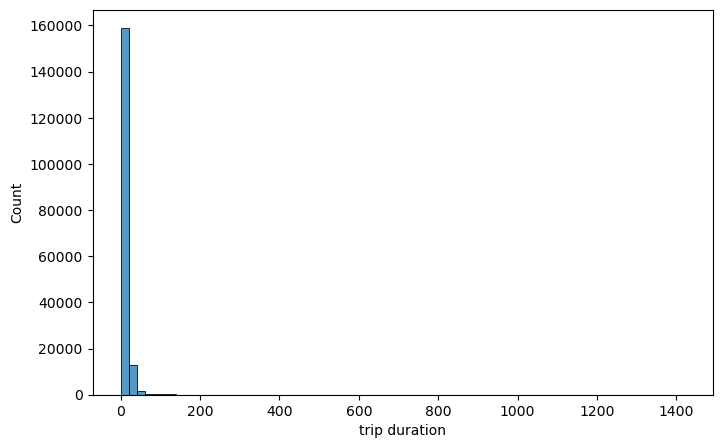

In [191]:
binsize=20
default_color = sns.color_palette()[0]
bins=np.arange(0,df_bike_clean['duration_min'].max()+binsize,binsize)
plt.figure(figsize=[8,5])
sns.histplot(data=df_bike_clean,x ='duration_min',bins=bins,color=default_color)
plt.xlabel('trip duration')
plt.show()

the data would be better viewed in a logarythmic scale

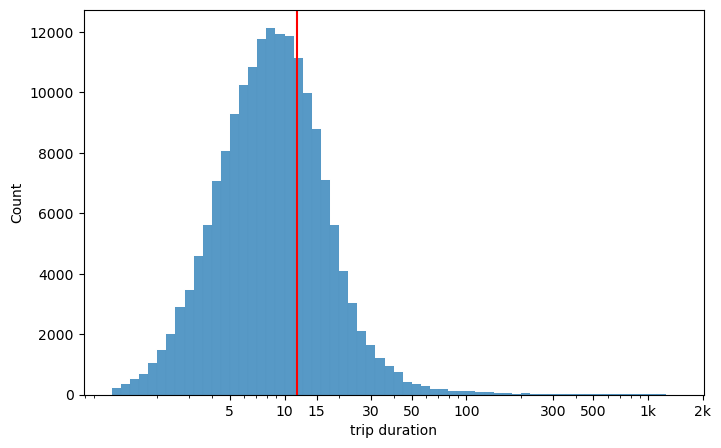

In [192]:
log_binsize = 0.05
bins = 10 ** np.arange(0.05, np.log10(df_bike_clean['duration_min'].max()) + log_binsize,log_binsize)
plt.figure(figsize=[8,5])
#plt.hist(data = df_bike_clean,x ='duration_min',bins = bins)
sns.histplot(data=df_bike_clean,x ='duration_min',bins=bins,color=default_color)


plt.xscale('log')
plt.xticks([5,10,15,30 ,50, 100,300,500, 1e3, 2e3], [5,10,15,30,50,100,300,500, '1k', '2k'])
plt.xlabel('trip duration')
plt.axvline(x=df_bike_clean.duration_min.mean(),color='red')

plt.show()

In [193]:
df_bike_clean.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

### Observations

`The histograms shows that most of the bikerides took between 5 mins and 15mins and a fews rides was more then way more than 300mins . it might because the users didnt log off after their rides for differentes reasons`

`The average duration is 11 minutes`

### Question

`How the Gobike fleet is distributed between customers and subscribers?`

### Visualization

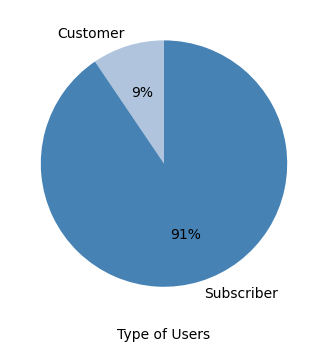

In [194]:
#Plot a pie chart for the user type distribution
plt.figure(figsize=[6,4])
default_color = sns.color_palette()[0]
df_bike_clean.groupby('user_type')\
.size().plot(kind='pie',startangle=90,autopct='%1.0f%%',textprops= {'fontsize':10},colors=['lightsteelblue','steelblue'])
plt.ylabel('',size=5)
plt.xlabel('Type of Users')
plt.show()

### Observations

`We can say that the majority of the bikerides in february 2019 were done by subscribers . Only 9% of them were made by customers.`

### Question

`How the usage of the Gobike Sharing is distributed gender wise?`

### Visualization

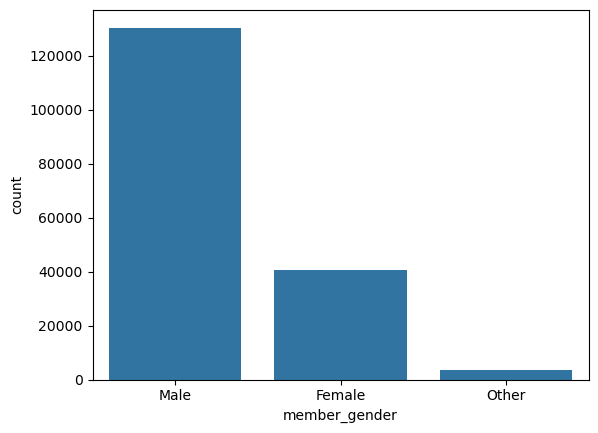

In [195]:
default_color=sns.color_palette()[0]
figsize=[8,5]
sns.countplot(data=df_bike_clean,x='member_gender',color=default_color,order=df_bike_clean.member_gender.value_counts().index)
plt.show()

### Observations

`There's is clearly more male bike users in this month of february`

### Question

`Let's looks for outlier's in the users age `

### Visualization

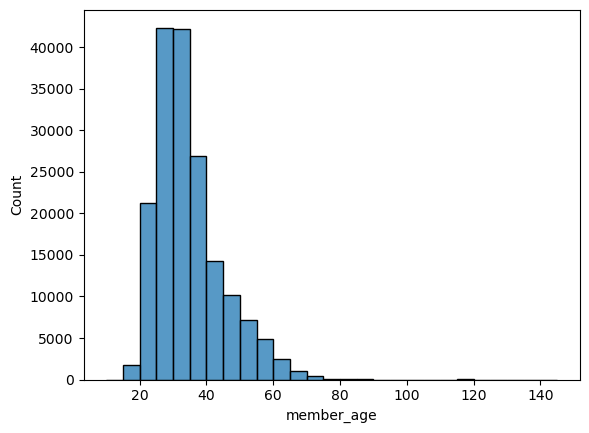

In [196]:
default_color=sns.color_palette()[0]
figsize=[8,5]
sns.histplot(data=df_bike_clean,x='member_age',bins=range(10,df_bike_clean.member_age.max()+5,5),color=default_color)
plt.show()


### Observations

`The distribution is right skewed. Most of the users have between 25 and 35 .There's clearly users with age that is not usual for bikeride so i decide that i will remove the users with an age >90. `

In [197]:
#Remove members with age >90 in the member_age column
df_bike_clean=df_bike_clean.drop(df_bike_clean[df_bike_clean.member_age>90].index)

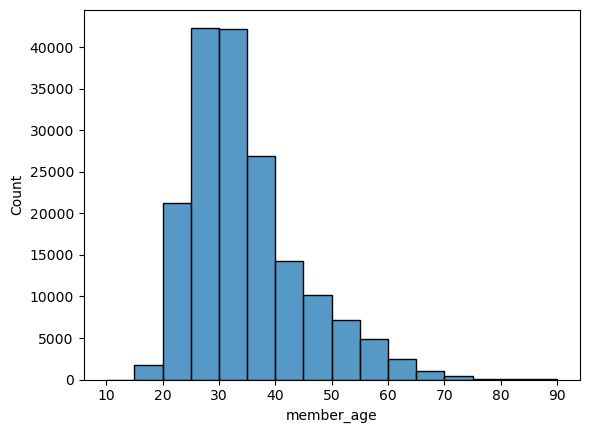

In [198]:
#Let's look at the new age distribution
default_color=sns.color_palette()[0]
figsize=[8,5]
sns.histplot(data=df_bike_clean,x='member_age',bins=range(10,df_bike_clean.member_age.max()+5,5),color=default_color)
plt.show()

### Question

`what day has the most bike users?`

### Visualization

In [199]:
#convert the start_day_name into a ordered categorical type
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_var=pd.api.types.CategoricalDtype(ordered=True,categories=days)
df_bike_clean['start_day_name']=df_bike_clean['start_day_name'].astype(ordered_var)
df_bike_clean['end_day_name']=df_bike_clean['end_day_name'].astype(ordered_var)

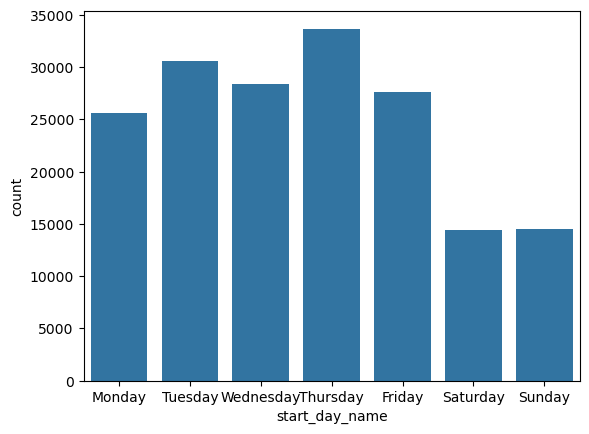

In [200]:
default_color=sns.color_palette()[0]
figsize=[8,5]
sns.countplot(data=df_bike_clean,x='start_day_name',color=default_color)
plt.show()

### Observations

`Bike are used the most on Thursday and Tuesday.`

### Question

`what time of the day there's the most usage of the bikes?`

### Visualization

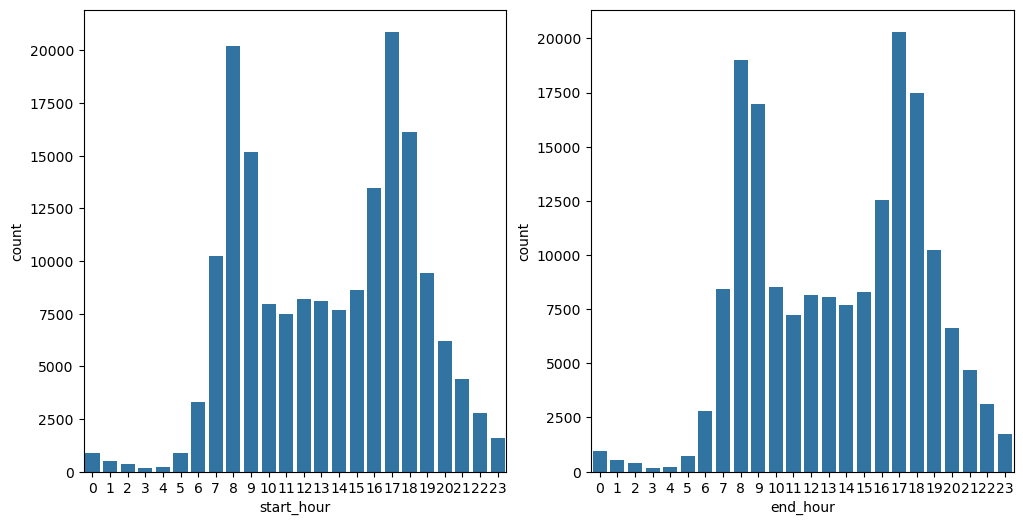

In [201]:
fig,ax=plt.subplots(1,2,figsize=[12,6])
default_color=sns.color_palette()[0]
sns.countplot(data=df_bike_clean,x='start_hour',color=default_color,ax=ax[0])
sns.countplot(data=df_bike_clean,x='end_hour',color=default_color,ax=ax[1])
plt.show()

### Observations

`Bike are used the most during rush hours. 8:00 in the morning  and 17:00  to 18:00 .`

### Question

`What is the most used stations?`

### Visualization

In [202]:
s=(df_bike_clean.start_station_name.value_counts(normalize=True)*100).nlargest(5)
s

Market St at 10th St                                         2.086633
San Francisco Caltrain Station 2  (Townsend St at 4th St)    1.947677
Berry St at 4th St                                           1.687491
Montgomery St BART Station (Market St at 2nd St)             1.549107
Powell St BART Station (Market St at 4th St)                 1.498213
Name: start_station_name, dtype: float64

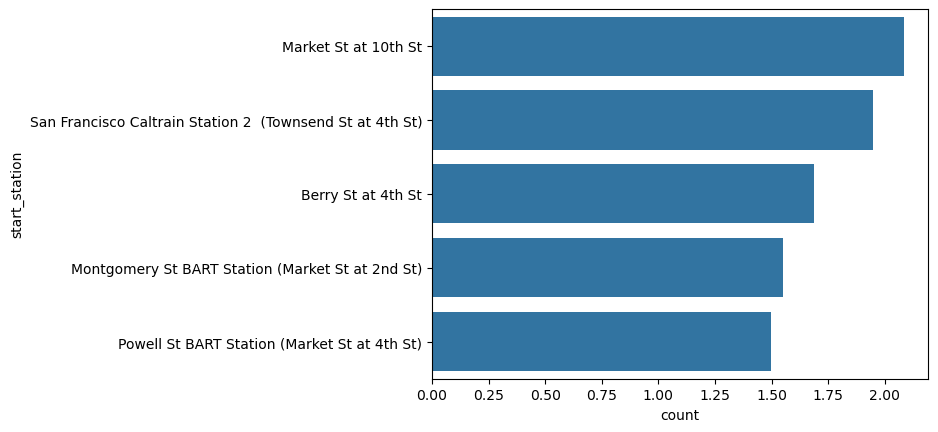

In [203]:
figsize=[8,5]
default_color=sns.color_palette()[0]
s=(df_bike_clean.start_station_name.value_counts(normalize=True)*100).nlargest(5)
s=s.rename_axis("start_station").reset_index(name="count")
sns.barplot(data=s,x="count",y="start_station",color=default_color)
plt.show()

In [204]:
m=(df_bike_clean.end_station_name.value_counts(normalize=True)*100).nlargest(5)
m

San Francisco Caltrain Station 2  (Townsend St at 4th St)    2.642459
Market St at 10th St                                         2.120944
Montgomery St BART Station (Market St at 2nd St)             1.978556
San Francisco Ferry Building (Harry Bridges Plaza)           1.801858
San Francisco Caltrain (Townsend St at 4th St)               1.635454
Name: end_station_name, dtype: float64

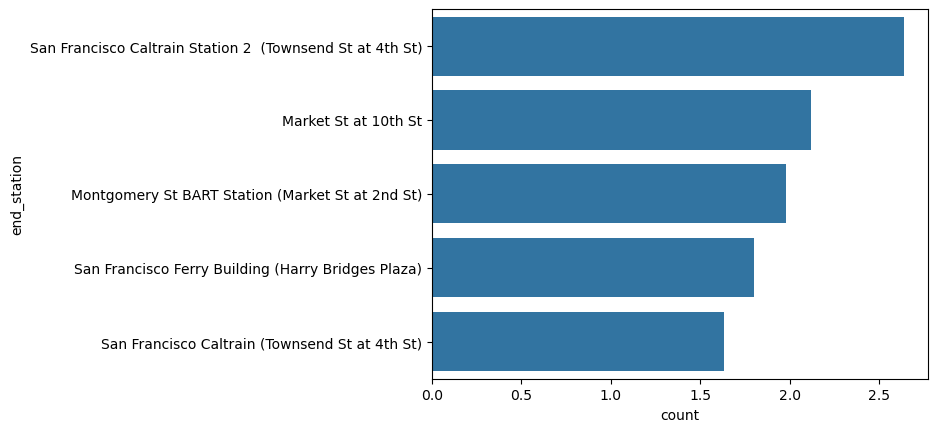

In [205]:
figsize=[8,5]
default_color=sns.color_palette()[0]
m=(df_bike_clean.end_station_name.value_counts(normalize=True)*100).nlargest(5)
m=m.rename_axis("end_station").reset_index(name="count")
sns.barplot(data=m,x="count",y="end_station",color=default_color)
plt.show()

### Observations

`Market St at 10th St is the busiest bike start station . San Francisco Caltrain Station 2  (Townsend St at 4th St) is the busiest end station`

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Most of the bikerides took between 5min and 15min and there were unsual point in the duration However i decided to not perform any transformation in the duration since there are maybe some users that can rent a bike for long hours

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing seems unsual except the age in which i did transformation by removing users where the age was > 75 because after this age it seems unsual to see people with a bike . There can be exception as always. 

> we also see that Mens use the most the bike rental in sanFrancisco 

> i've added more columns (**start_day ,start_hour,start_day_name**)from the start_time and end_time columns (**end_day ,end_hour,end_day_name**) in order look in more details to the data

> the usage is more frequent on thursday at the rush hour (8:00 am and 5:00 pm) and the busiest start station is Market St at 10th St while the busiest end station is San Francisco Caltrain Station 2  (Townsend St at 4th St)


<h2 style="color:#c94c4c"> Bivariate Exploration </h2>

Here's the categorical variables  in our dataset 
**start_station_name,end_station_name,user_type,member_gender,start_day_name,end_day_name**

Here's the numeric variables  in our dataset 
**duration_sec,bike_id,start_day,start_hour,end_day,end_hour,member_age**


In [206]:
numeric_var=['duration_min','bike_id','start_day','start_hour','end_day','end_hour','member_age']
needed_numeric_var=['duration_min','member_age']
categorical_var=['start_station_name','end_station_name','user_type','member_gender','start_day_name','end_day_name']

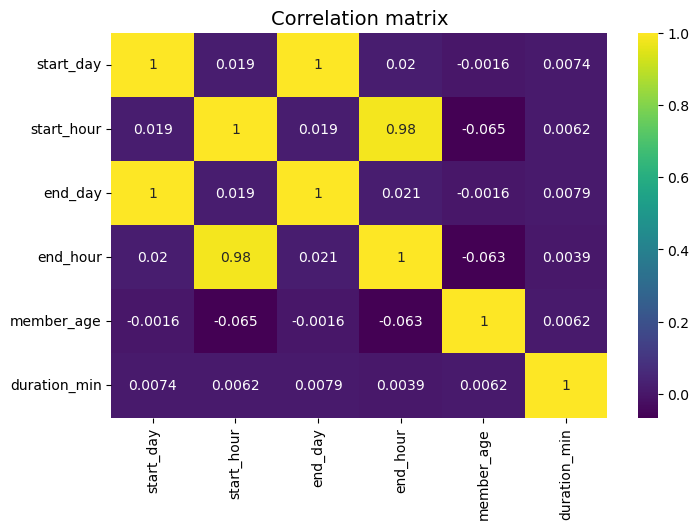

In [207]:
plt.figure(figsize = (8,5), dpi = 100)

sns.heatmap(df_bike_clean.corr(),cmap="viridis",annot=True)
plt.title("Correlation matrix",fontsize=14)
plt.show()

### Question

`Relation between member_age and member_genre in the gobike rental usage`

### Visualization

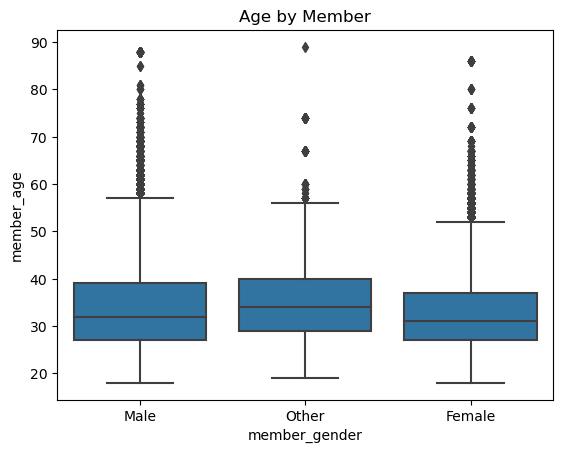

In [208]:
figsize=[8,5]
default_color=sns.color_palette()[0]
sns.boxplot(data=df_bike_clean,x='member_gender',y='member_age',color=default_color).set_title('Age by Member')
plt.show()

### Observations

> * `With this boxplot that show the distribution of the member age by gender ,we can see the median age of the 'other' is about 35 and the median age of male users is about 33 and female is 30 `

> * `We can see the central  50% age range of male is between 28 and 39 while the 50% central range of female is between 28 and 37.`

> * `we can see that the youngest female is 18 and the youngest male is 18 too .`

### Question

`Relation between the trip duration ,the member age and the significant categorial variables`

### Visualization

In [209]:
round((df_bike_clean.shape[0]*1)/100)

1749

<Figure size 1000x1000 with 0 Axes>

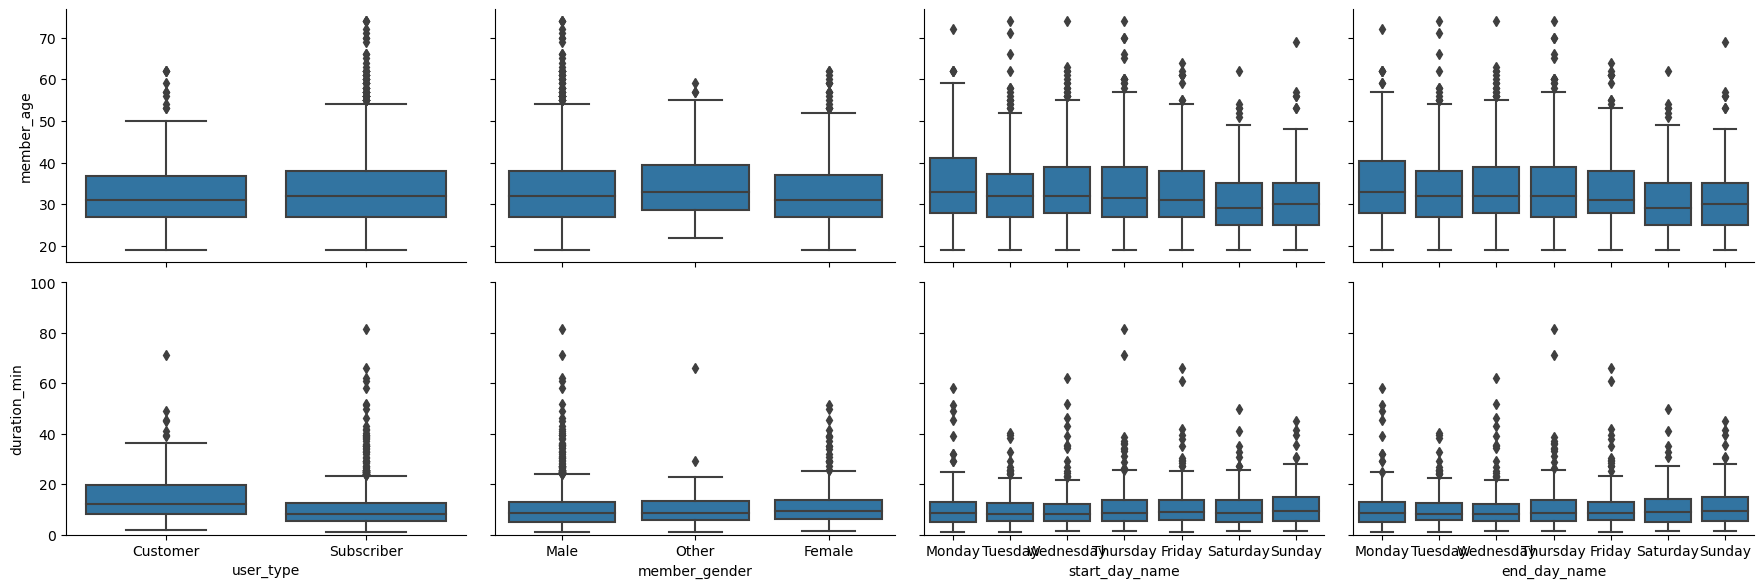

In [210]:
bike_sample= df_bike_clean.sample(n=round((df_bike_clean.shape[0]*1)/100), replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = bike_sample, y_vars = ['member_age','duration_min'], x_vars = ['user_type','member_gender','start_day_name','end_day_name'],
                height = 3, aspect = 1.5)
plt.ylim(0,100)
g.map(boxgrid)
plt.show();

### Observations

> * `Customers bikers have in average longer trip than subscriber bikers `

> * `Female users bike a little bit longer in average than male users .`

> * `bike ride on weekend are longer than in the one in weekdays `

> * `the median age of customers is higher than the median age of subscribers`

> * `the median age of male is slightly higher than the median age of female`





### Question

`Relation between the others quantitatives variables column() and the duration`

### Visualization

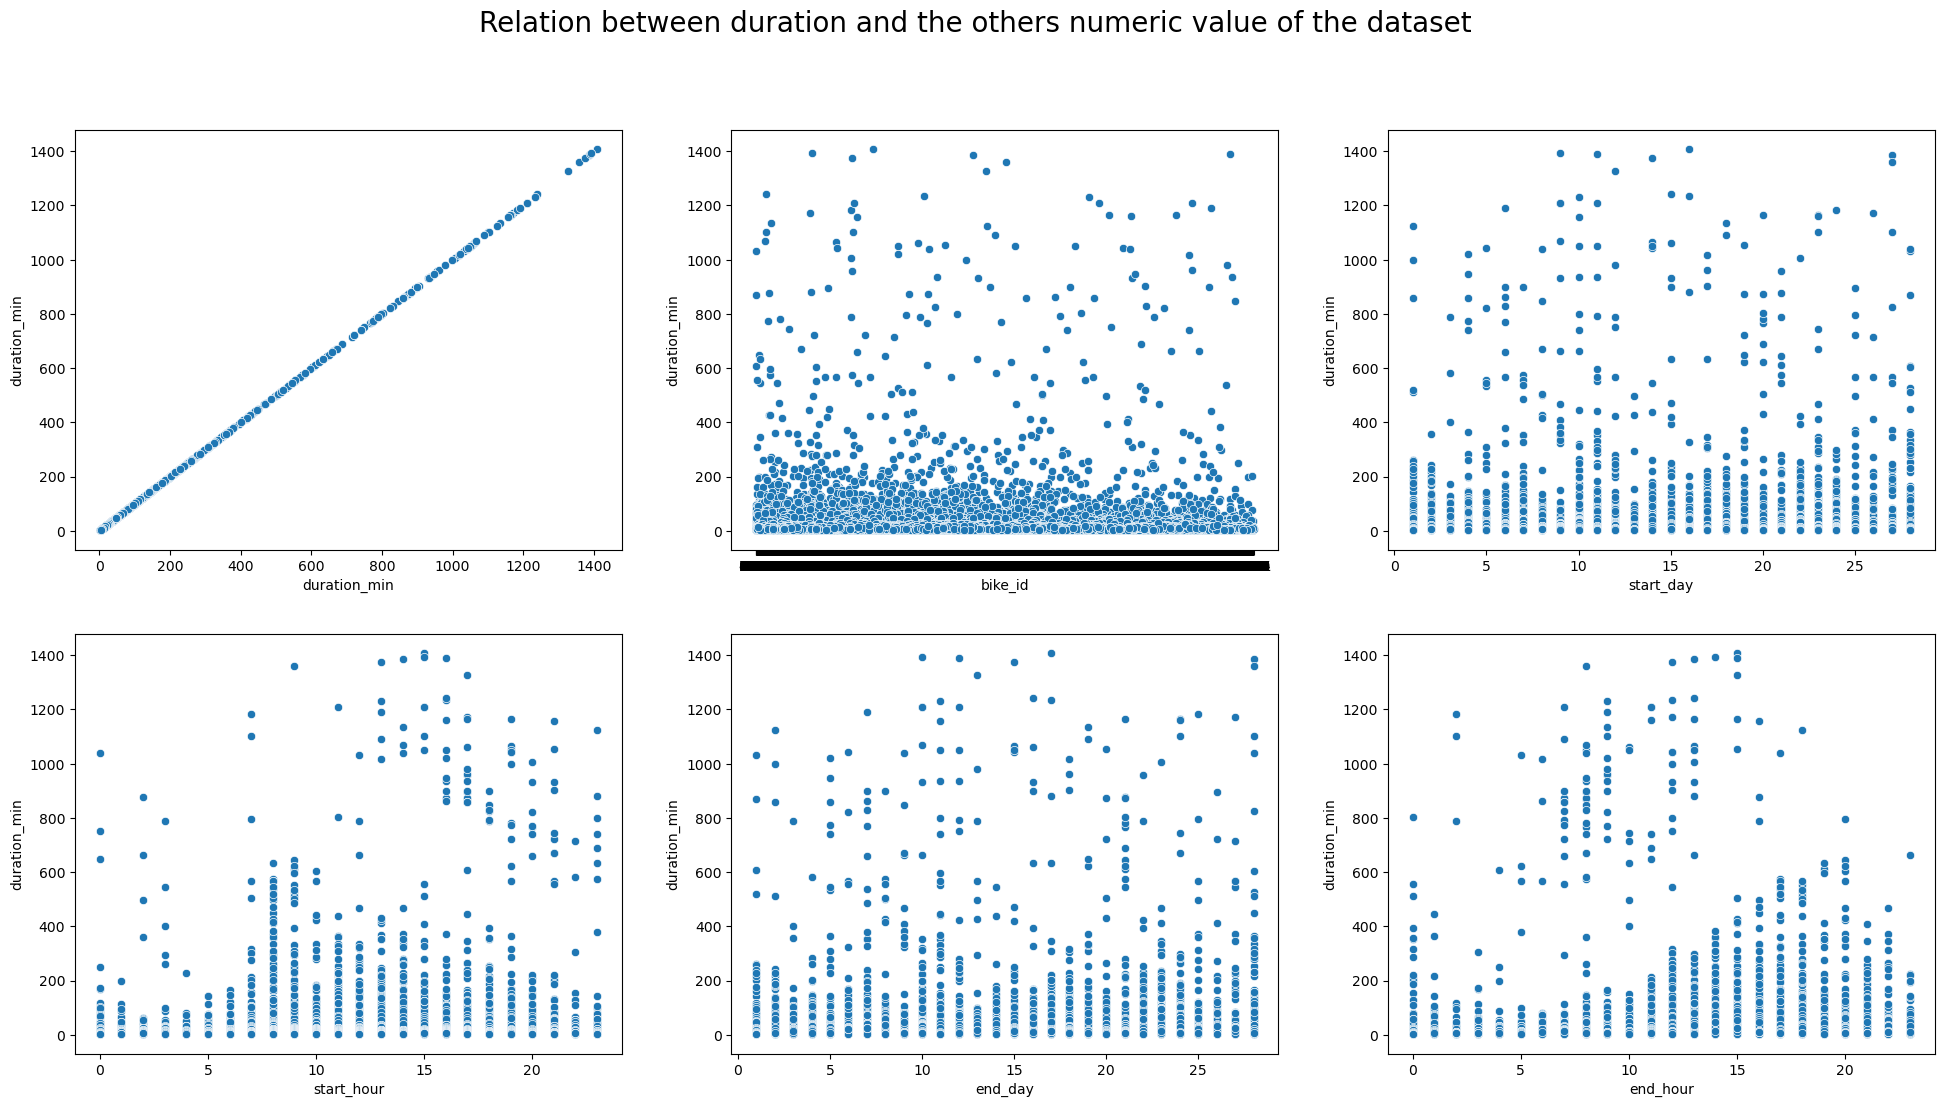

In [211]:
color=sns.color_palette()[0]
nrows,ncols=2,3
var=['start_day','start_hour','end_day','end_hour','member_age']
fig,ax=plt.subplots(2,3,figsize=[24,12])
fig.suptitle("Relation between duration and the others numeric value of the dataset",fontsize=20)
for i in range (2):
    for j in range(3):
        sns.scatterplot(data=df_bike_clean,x=df_bike_clean[numeric_var[i*3+j]],\
                        y=df_bike_clean['duration_min'],color=color,ax=ax[i,j])
plt.show()

### Question

`Relation between the others quantitatives variables column() and the duration`

### Visualization

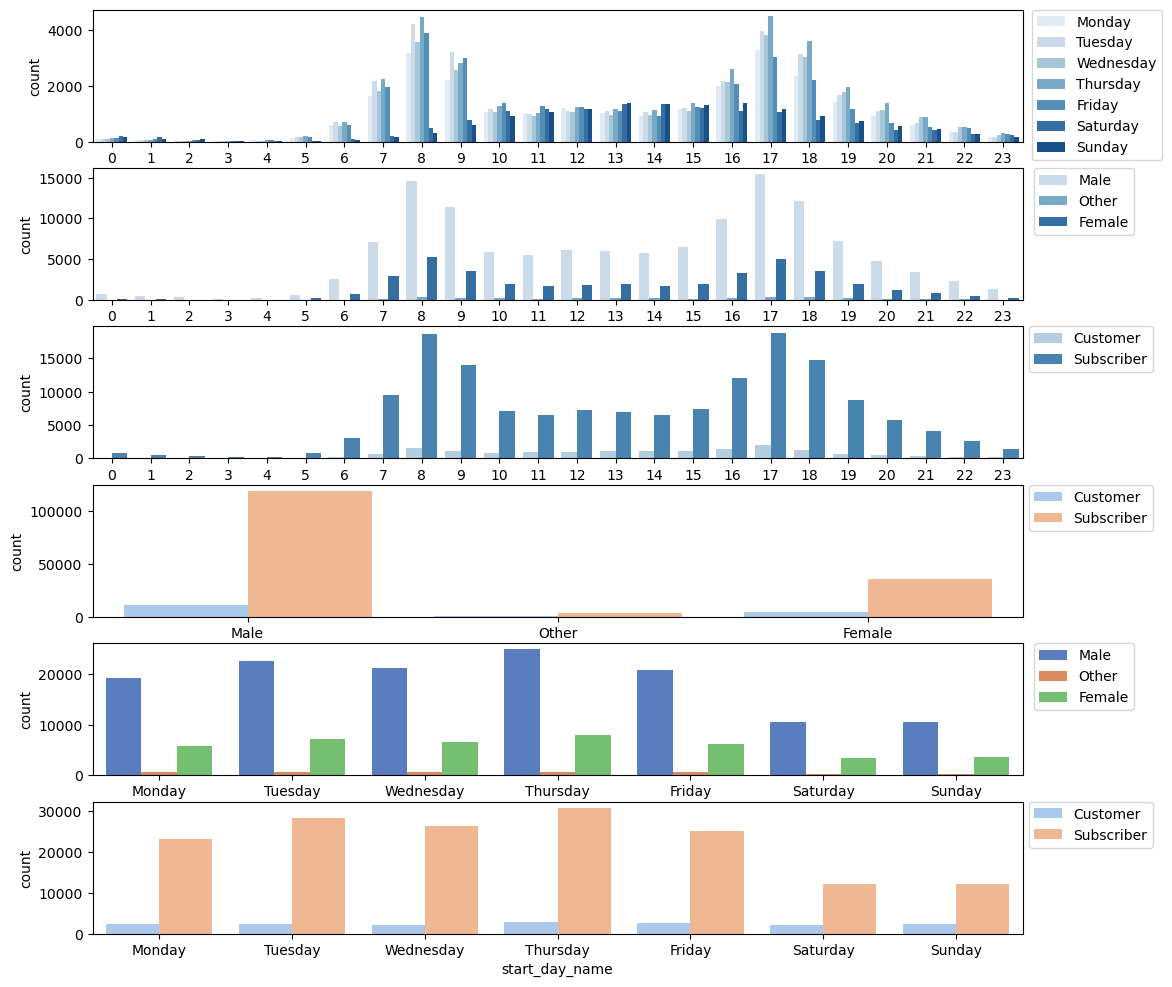

In [212]:
plt.figure(figsize=[12,12])

# subplot 1: color vs cut
ax=plt.subplot(6, 1, 1)
sns.countplot(data = df_bike_clean, x = 'start_hour', hue = 'start_day_name', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.01,1),borderaxespad=0)
#ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
# subplot 2: color vs cut
plt.subplot(6, 1, 2)
sns.countplot(data = df_bike_clean, x = 'start_hour', hue = 'member_gender', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.12,1),borderaxespad=0)
# subplot 3: color vs cut
plt.subplot(6, 1, 3)
sns.countplot(data = df_bike_clean, x = 'start_hour', hue = 'user_type', palette = 'Blues')
plt.legend(bbox_to_anchor=(1.14,1),borderaxespad=0)
# subplot 4: color vs cut
plt.subplot(6, 1, 4)
sns.countplot(data = df_bike_clean, x = 'member_gender', hue = 'user_type', palette = 'pastel')
plt.legend(bbox_to_anchor=(1.14,1),borderaxespad=0)
# subplot 5: color vs cut
plt.subplot(6, 1, 5)
sns.countplot(data = df_bike_clean, x = 'start_day_name', hue = 'member_gender', palette = 'muted')
plt.legend(bbox_to_anchor=(1.12,1),borderaxespad=0)
# subplot 6: color vs cut
plt.subplot(6, 1, 6)
sns.countplot(data = df_bike_clean, x = 'start_day_name', hue = 'user_type', palette = 'pastel')
plt.legend(bbox_to_anchor=(1.14,1),borderaxespad=0)

plt.show()

### Observations

>`There is higher amount of biker the thurdays at 8am et 5pm and the usage of bike at his lowest between 3am and 5am everyday .`

>`Female bikers tends to not use the bikes between midnight and 5AM and it can be for safety reasons`

>`In the male as well as in the female there is more subscriber than customers`


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **Variable of interest : duration**

- __Subscribers__ that have the possibility to ride regularly use it for short ride and the __customers__ tends to use it for longer time.
- there is no clear correlation between the __age__ and the duration of the rides
- the __genre__ did not impact the trip duration 
- There is a peak usage at 8am and 17pm which shows commute for work.
-

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>There is no significant relationship between others features in my analysis

 <h2 style="color:#c94c4c">Multivariate Exploration </h2>

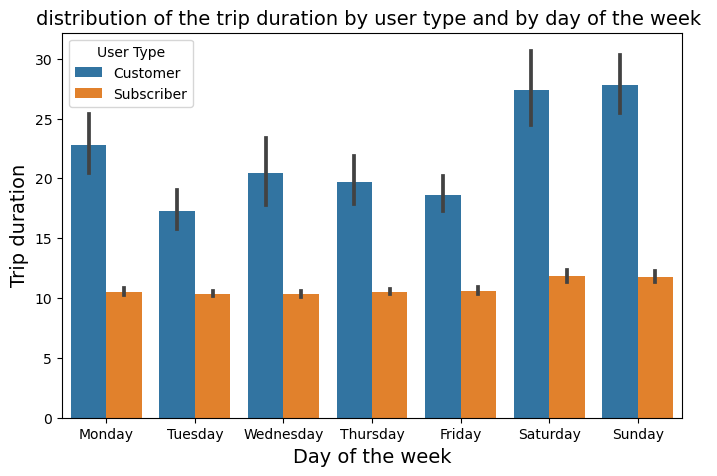

In [213]:
#Distibution of the trip duration by user type and by day of the week 
plt.figure(figsize = (8,5), dpi = 100)
sns.barplot(data = df_bike_clean, x = "start_day_name", y = "duration_min", hue='user_type')
plt.xlabel("Day of the week", fontsize=14)
plt.ylabel("Trip duration", fontsize=14)
plt.title("distribution of the trip duration by user type and by day of the week ",fontsize=14)
plt.legend(title="User Type")
plt.show()

`The customers have trips that are longer than the subscribers`

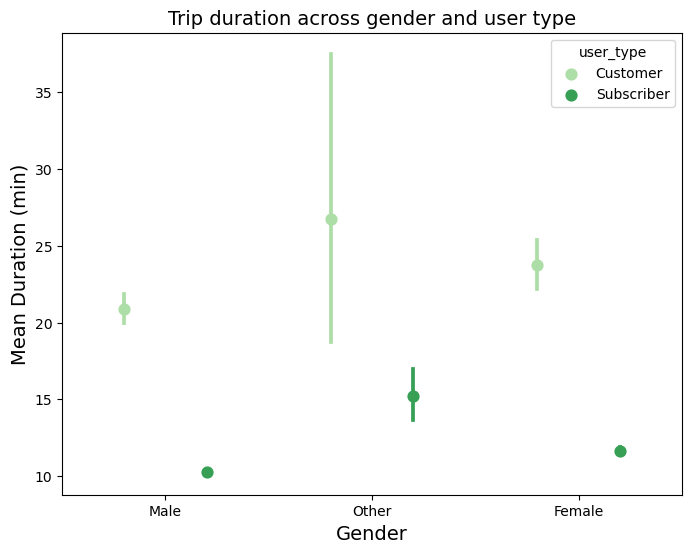

In [214]:
fig = plt.figure(figsize = [8,6])
ax = sns.pointplot(data = df_bike_clean, x = 'member_gender', y = 'duration_min', hue = 'user_type',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.title('Trip duration across gender and user type',fontsize=14)
plt.xlabel("Gender", fontsize=14)
plt.ylabel('Mean Duration (min)', fontsize=14)
ax.set_yticklabels([],minor = True)
plt.show();

`Among the type of users ,we can see that female bike longer trip than male and the other gender`

In [215]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(18,df_bike_clean['member_age'].max()+2,2)
    bins_y = np.arange(0,2, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.yticks(log_trans(np.array([1, 2, 5, 10, 20, 50,100])),
               [1, 2, 5, 10, 20, 50,100])

In [216]:
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_bike_clean['log_duration_min']=df_bike_clean['duration_min'].apply(log_trans)


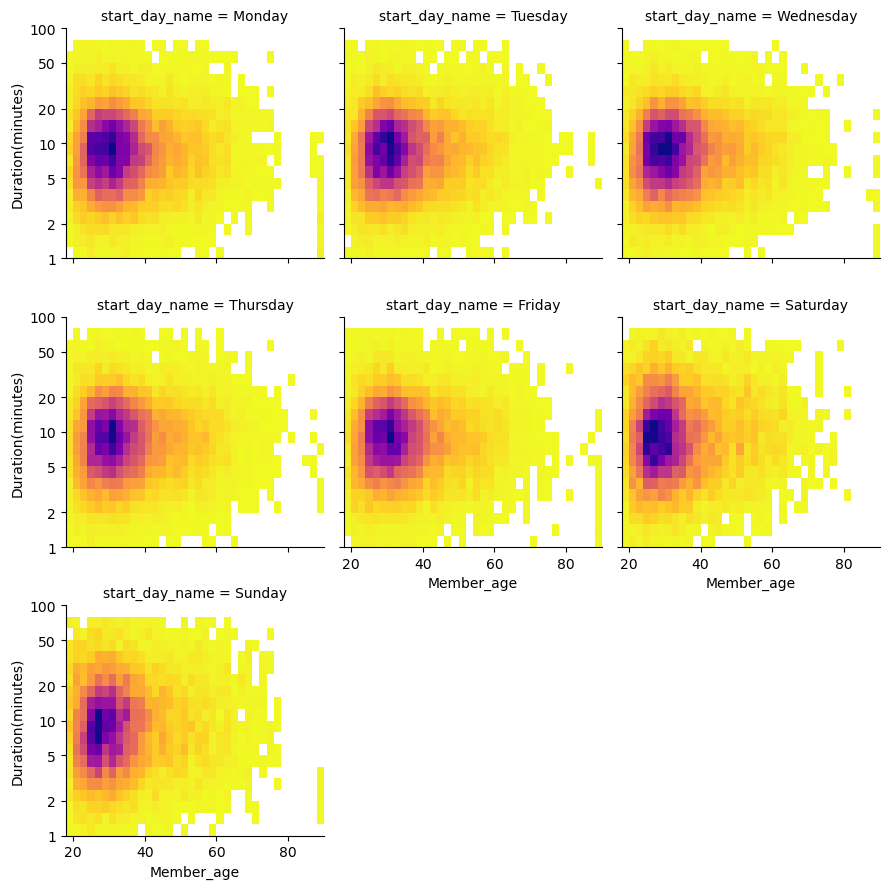

In [217]:
# create faceted heat maps on levels of the day of the week(start_day_name) variable
g = sns.FacetGrid(data = df_bike_clean, col = 'start_day_name', col_wrap = 3, height = 3)
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'plasma_r')
g.set_xlabels('Member_age')
g.set_ylabels('Duration(minutes)');


> `The trip duration is more longer in the weekend than the other days`

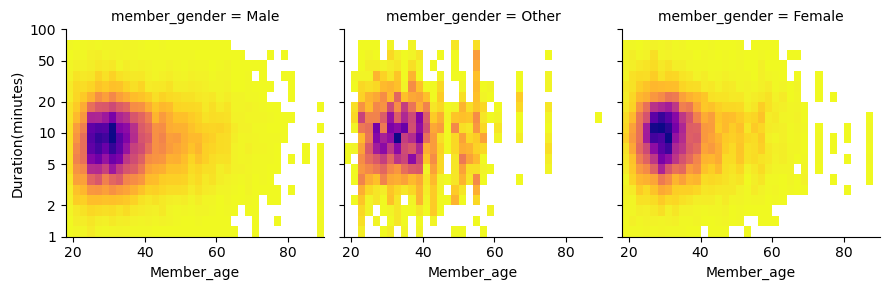

In [218]:
g = sns.FacetGrid(data = df_bike_clean, col = 'member_gender', height = 3)
g.map(hist2dgrid, 'member_age', 'log_duration_min', color = 'plasma_r')
g.set_xlabels('Member_age')
g.set_ylabels('Duration(minutes)')

plt.show()

> `Male have shorter trip than female and other gender. The differents seems not that significant because it is subtle`

>

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the Multivariate analysis ,we can confirm our conclusion in the bivariate analysis. The relationship were between the trip duration and the gender,the trip duration and the hour of the day and the day of the week and also the trip duration and the type of users

### Were there any interesting or surprising interactions between features?

> There was not really strong  correlation between the trip duration and neither the gender or the age of the bike rider 

## <h2 style="color:#c94c4c"> Conclusions </h2>


The analysis shows that there are gender and user-type differences in bike usage patterns. Female users tend to ride longer but avoid biking at night, and customers have longer trips than subscribers. The higher frequency of bike usage on Thursday and during rush hours suggests that the bike-sharing system is primarily used for commuting purposes. Furthermore, the high number of subscribers indicates that the system is more frequently used by regular users rather than occasional ones. These findings can be used to optimize the bike-sharing system to better cater to the needs of different user groups and encourage more sustainable transportation.
